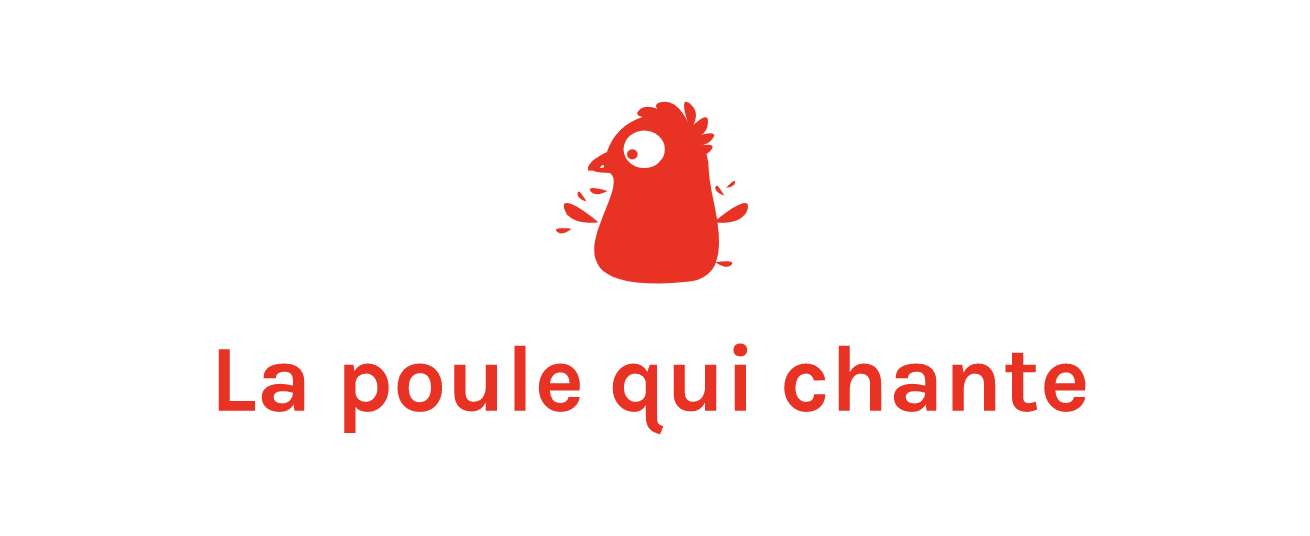

## Produisez une étude de marché avec R ou Python 

## Importation Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestCentroid
import plotly.express as px
import scipy.cluster.hierarchy as shc

## Nettoyage des données

In [2]:
df_disp = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
df_pop = pd.read_csv('Population_2000_2018.csv')
df_pbi = pd.read_csv('PPA.csv')

In [3]:
df_disp.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
df_disp = df_disp.loc[(df_disp['Produit']=="Viande de Volailles")]
df_disp.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [5]:
df_disp.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,2061.000000,2061.000000,2061.0,2061.0,2061.0,2061.000000
mean,125.663270,3777.619602,2734.0,2017.0,2017.0,198.614794
std,72.862593,2212.984601,0.0,0.0,0.0,1173.205732
min,1.000000,645.000000,2734.0,2017.0,2017.0,-125.000000
25%,63.000000,674.000000,2734.0,2017.0,2017.0,1.000000
50%,121.000000,5142.000000,2734.0,2017.0,2017.0,9.440000
75%,188.000000,5301.000000,2734.0,2017.0,2017.0,57.000000
max,276.000000,5911.000000,2734.0,2017.0,2017.0,21914.000000


In [6]:
df_pop.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [7]:
df_pop.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [8]:
df_pop = df_pop.loc[(df_pop['Année']==2017)]
df_pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [9]:
df_pbi.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.40,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.30,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.00,X,Ciffre de sources internationales,NaN


In [10]:
df_pbi.drop(['Code Domaine', 'Domaine', 'Élément'], axis=1, inplace=True)
df_pbi.rename(columns={'Produit' : 'Élément'}, inplace=True)
df_pbi

,Code zone (M49),Zone,Code Élément,Code Produit,Élément,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,4,Afghanistan,6126,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.40,X,Ciffre de sources internationales,NaN
1,4,Afghanistan,6125,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,710,Afrique du Sud,6126,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.30,X,Ciffre de sources internationales,NaN
3,710,Afrique du Sud,6125,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
4,8,Albanie,6126,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.00,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
379,887,Yémen,6125,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Ciffre de sources internationales,NaN
380,894,Zambie,6126,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3485.00,X,Ciffre de sources internationales,NaN
381,894,Zambie,6125,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Ciffre de sources internationales,NaN
382,716,Zimbabwe,6126,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3795.60,X,Ciffre de sources internationales,NaN


In [11]:
data = pd.concat([df_disp, df_pop, df_pbi]) # Concaténation
data

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,Code zone (M49)
651,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées,NaN,NaN
652,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées,NaN,NaN
653,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées,NaN,NaN
654,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées,NaN,NaN
655,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,NaN,NaN,NaN,Yémen,6125,Stabilité politique et absence de violence/ter...,21032,NaN,2017,2017,indice,-2.94,X,Ciffre de sources internationales,NaN,887.0
380,NaN,NaN,NaN,Zambie,6126,"PIB par habitant, ($ PPA internationaux consta...",22013,NaN,2017,2017,I$,3485.00,X,Ciffre de sources internationales,NaN,894.0
381,NaN,NaN,NaN,Zambie,6125,Stabilité politique et absence de violence/ter...,21032,NaN,2017,2017,indice,0.15,X,Ciffre de sources internationales,NaN,894.0
382,NaN,NaN,NaN,Zimbabwe,6126,"PIB par habitant, ($ PPA internationaux consta...",22013,NaN,2017,2017,I$,3795.60,X,Ciffre de sources internationales,NaN,716.0


In [12]:
data = data.pivot_table(index='Zone', values='Valeur', columns=['Élément'])
data.columns.name = None
data.rename_axis(None, axis=1)
data.reset_index(inplace=True)
data.set_index('Zone')
data.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Nourriture,"PIB par habitant, ($ PPA internationaux constants de 2017)",Pertes,Population totale,Production,Résidus,Semences,Stabilité politique et absence de violence/terrorisme (indice),Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,...,55.0,2058.4,2.0,36296.113,28.0,0.0,NaN,-2.80,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,...,2035.0,13860.3,83.0,57009.756,1667.0,0.0,NaN,-0.28,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,...,47.0,12771.0,NaN,2884.169,13.0,0.0,NaN,0.38,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,...,264.0,11737.4,13.0,41389.189,275.0,0.0,NaN,-0.92,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,...,1609.0,53071.5,NaN,82658.409,1514.0,-38.0,NaN,0.59,167.0,-29.0


In [13]:
data.describe(include='all')

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Nourriture,"PIB par habitant, ($ PPA internationaux constants de 2017)",Pertes,Population totale,Production,Résidus,Semences,Stabilité politique et absence de violence/terrorisme (indice),Traitement,Variation de stock
count,237,78.000000,1.0,34.000000,172.000000,172.000000,172.000000,172.000000,170.000000,135.000000,...,170.000000,187.000000,67.000000,2.360000e+02,168.000000,164.000000,1.0,197.000000,46.000000,169.000000
unique,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.217949,0.0,44.117647,74.558140,20.213372,4.898430,7.121279,687.594118,132.185185,...,657.047059,20925.340642,43.582090,3.198362e+04,725.190476,-2.835366,0.0,-0.061777,26.282609,13.668639
std,NaN,2.399391,NaN,142.433135,60.571277,15.860311,4.191336,5.603464,2187.184747,513.784440,...,2136.545796,22086.259174,120.818816,1.318949e+05,2501.457125,13.579702,NaN,0.994815,55.020668,75.364884
min,NaN,-18.000000,0.0,0.000000,0.000000,0.130000,0.030000,0.040000,2.000000,0.000000,...,2.000000,773.600000,0.000000,7.930000e-01,0.000000,-125.000000,0.0,-2.940000,0.000000,-119.000000
25%,NaN,0.000000,0.0,0.000000,22.000000,6.440000,1.460000,2.165000,30.500000,0.000000,...,28.500000,4862.700000,1.000000,3.803032e+02,13.750000,0.000000,0.0,-0.650000,1.000000,0.000000
50%,NaN,0.000000,0.0,2.000000,64.000000,18.090000,3.745000,6.505000,100.000000,3.000000,...,99.500000,13102.100000,4.000000,5.203511e+03,70.000000,0.000000,0.0,0.040000,4.000000,0.000000
75%,NaN,0.000000,0.0,14.500000,105.500000,30.037500,6.597500,10.365000,368.250000,32.000000,...,365.250000,29087.350000,29.500000,1.930842e+04,409.750000,0.000000,0.0,0.770000,17.500000,7.000000


In [14]:
column_names = list(data.columns.values)
column_names

['Zone',
 'Alimentation pour touristes',
 'Aliments pour animaux',
 'Autres utilisations (non alimentaire)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Nourriture',
 'PIB par habitant, ($ PPA internationaux constants de 2017)',
 'Pertes',
 'Population totale',
 'Production',
 'Résidus',
 'Semences',
 'Stabilité politique et absence de violence/terrorisme (indice)',
 'Traitement',
 'Variation de stock']

In [15]:
data = data.drop(['Aliments pour animaux', 'Alimentation pour touristes', 'Autres utilisations (non alimentaire)', 'Exportations - Quantité', 'Pertes', 'Semences', 'Résidus', 'Traitement', 'Variation de stock'], axis=1)
# Prod+Imp+Var-Exp = Dispo intérieure

In [16]:
data=data.dropna()

In [17]:
data.set_index('Zone', drop=True, inplace=True)

In [18]:
pop_2017 = 7578000 # Population mondiale en 2017 (miliers d'habitants)
print(round(data['Population totale'].sum() / pop_2017 * 100, 1),'% de la population mondiale en 2017 representée.')

76.4 % de la population mondiale en 2017 representée.


## Correlation entre variables

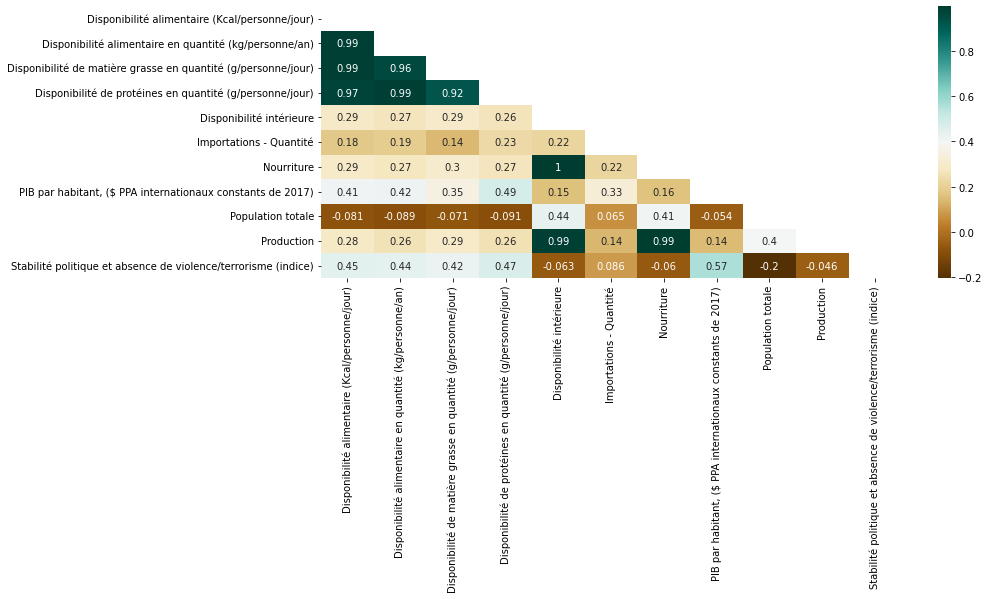

In [19]:
# Calculate pairwise-correlation
matrix = data.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [20]:
data = data.drop(['Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Nourriture'], axis=1)

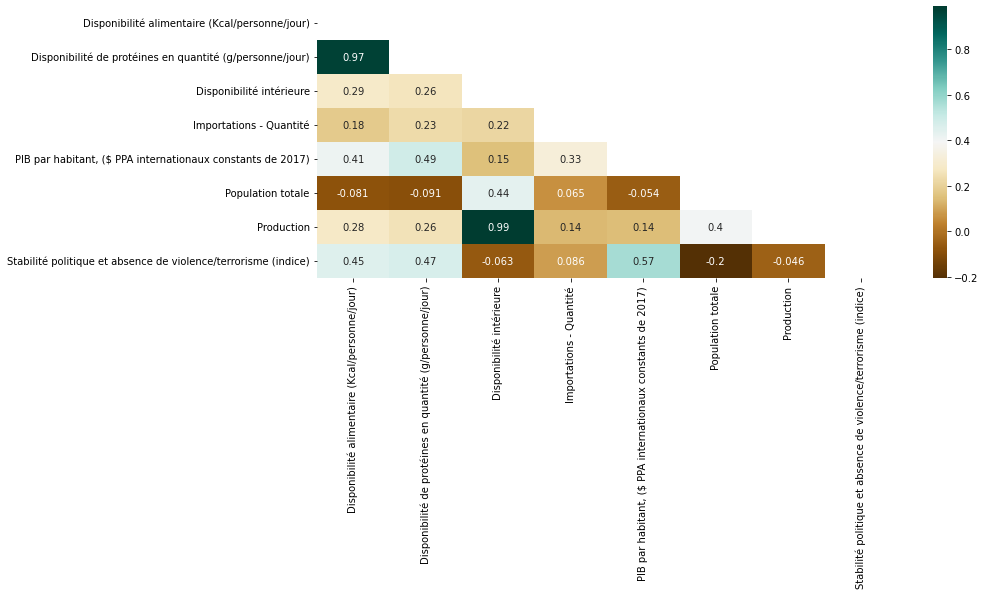

In [21]:
# Calculate pairwise-correlation
matrix = data.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [22]:
data.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,"PIB par habitant, ($ PPA internationaux constants de 2017)",Population totale,Production,Stabilité politique et absence de violence/terrorisme (indice)
count,160.000000,160.000000,160.000000,160.000000,160.000000,1.600000e+02,160.000000,160.000000
mean,75.262500,7.199500,604.043750,88.456250,20619.842500,3.618233e+04,638.137500,-0.045625
std,61.158778,5.637422,1772.329297,188.754602,20972.624049,1.146268e+05,2149.733974,0.884016
min,0.000000,0.040000,2.000000,0.000000,912.800000,5.204500e+01,0.000000,-2.800000
25%,22.000000,2.165000,32.000000,3.000000,5008.675000,2.911678e+03,13.750000,-0.622500
50%,65.000000,6.585000,100.000000,16.000000,13509.500000,9.608513e+03,70.000000,0.015000
75%,105.500000,10.365000,360.750000,79.750000,29641.225000,3.118956e+04,368.750000,0.660000
max,243.000000,27.870000,18266.000000,1069.000000,126144.000000,1.338677e+06,21914.000000,1.600000


In [23]:
data.sort_values(by=['Disponibilité intérieure'], ascending= False).head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,"PIB par habitant, ($ PPA internationaux constants de 2017)",Population totale,Production,Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,
États-Unis d'Amérique,219.0,19.93,18266.0,123.0,59914.8,325084.756,21914.0,0.29
Brésil,204.0,15.68,9982.0,3.0,14524.6,207833.823,14201.0,-0.47
Fédération de Russie,104.0,10.44,4556.0,226.0,25926.4,145530.082,4444.0,-0.64
Mexique,123.0,9.26,4219.0,972.0,19721.3,124777.324,3249.0,-0.80
Inde,7.0,0.75,3661.0,0.0,6182.9,1338676.785,3545.0,-0.76


## Normalisation

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-1.15246098e+00, -1.18501141e+00, -3.09627177e-01, ...,
         9.95770883e-04, -2.84711118e-01, -3.12553585e+00],
       [ 1.11104538e+00,  1.22967510e+00,  8.56900385e-01, ...,
         1.82268150e-01,  4.80102589e-01, -2.65957781e-01],
       [ 1.59716617e-01, -1.67177449e-01, -3.15287185e-01, ...,
        -2.91403909e-01, -2.91710634e-01,  4.82979331e-01],
       ...,
       [ 2.35761410e+00,  2.26530337e+00,  9.99668062e+00, ...,
         2.52828682e+00,  9.92804836e+00,  3.80851543e-01],
       [-1.23447208e+00, -1.27398291e+00, -3.33965210e-01, ...,
         6.14498892e-01, -2.91243999e-01, -1.85461226e+00],
       [-9.39232124e-01, -1.01240670e+00, -3.40191218e-01, ...,
        -3.11078086e-01, -2.97776880e-01,  2.78723755e-01]])

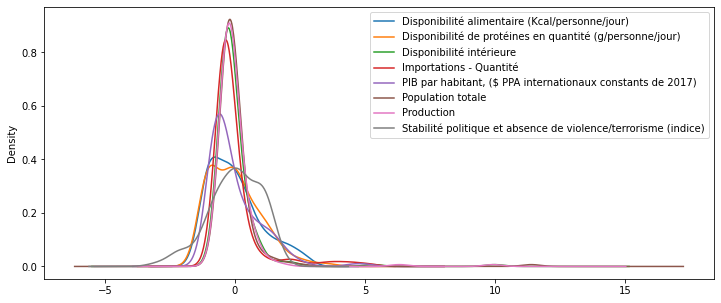

In [25]:
X_scaled = pd.DataFrame(X_scaled,columns=(data).columns)
X_scaled.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.show()

In [26]:
X_scaled.to_csv("x_scaled.csv")
data.to_csv("data.csv") 

## PCA

In [27]:
pca = PCA(n_components=8)
X_projected = pca.fit_transform(X_scaled)
X_Projected = pd.DataFrame(X_projected, index=data.index, columns=["F"+str(i+1) for i in range(8)])

In [28]:
f1 = pca.components_[0] #f1 combinaison linéaire des autres variables 0,48*Disponibilité alimentaire 0,49*Disponibilité de protéines en quantité etc.
print(f1)

[0.48223539 0.49111442 0.34743322 0.22817072 0.37716828 0.06610601
 0.33930806 0.3028664 ]


In [29]:
pca.explained_variance_ratio_

array([0.38401169, 0.27017578, 0.12285667, 0.09533365, 0.07790047,
       0.04584902, 0.00295751, 0.00091521])

In [30]:
pca.explained_variance_ratio_.cumsum()

array([0.38401169, 0.65418747, 0.77704414, 0.87237779, 0.95027826,
       0.99612728, 0.99908479, 1.        ])

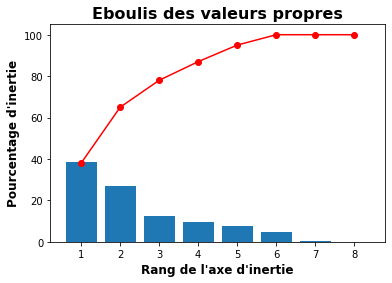

In [31]:
n_components = 8
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie", fontsize=12, y=1, weight='bold')
plt.ylabel("Pourcentage d'inertie", fontsize=12, y=0.5, weight='bold')
plt.title("Eboulis des valeurs propres", fontsize=16, y=1, weight='bold')
plt.show(block=False)

In [32]:
pca = PCA(n_components=4)
X_projected = pca.fit_transform(X_scaled)
X_Projected = pd.DataFrame(X_projected, index=data.index, columns=["F"+str(i+1) for i in range(4)])

## Cercles de Correlation

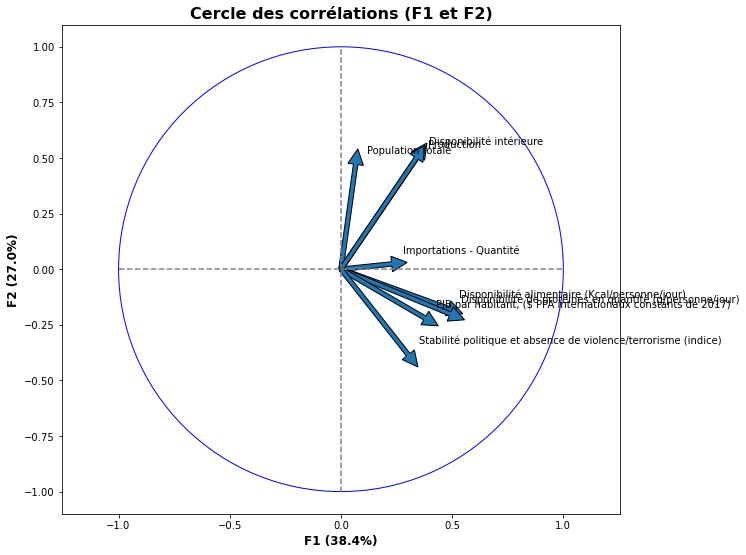

In [33]:
features = data.columns
features
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel("F{} ({}%)".format(x+1, round(100*pca.explained_variance_ratio_[x],1)), fontsize=12, y=1, weight='bold')
plt.ylabel("F{} ({}%)".format(y+1, round(100*pca.explained_variance_ratio_[y],1)), fontsize=12, y=0.5, weight='bold')

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontsize=16, y=1, weight='bold')


an = np.linspace(0, 2 * np.pi, 100)
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

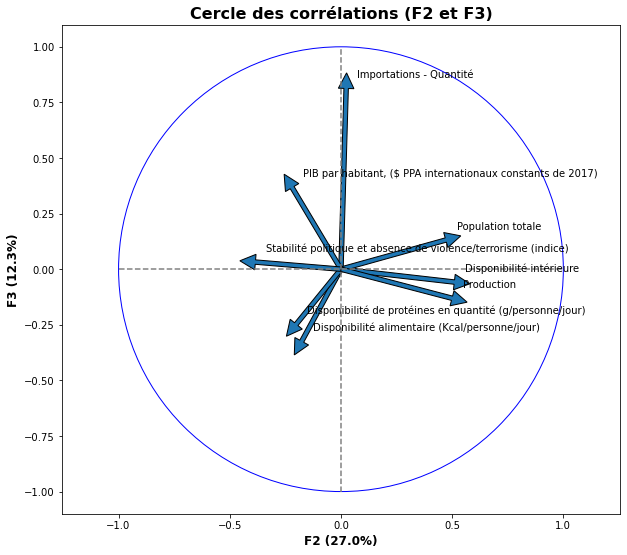

In [34]:
features = data.columns
features
x, y = 1,2
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #1 for PC2
             pca.components_[y, i],  #2 for PC3
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel("F{} ({}%)".format(x+1, round(100*pca.explained_variance_ratio_[x],1)), fontsize=12, y=1, weight='bold')
plt.ylabel("F{} ({}%)".format(y+1, round(100*pca.explained_variance_ratio_[y],1)), fontsize=12, y=0.5, weight='bold')

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontsize=16, y=1, weight='bold')


an = np.linspace(0, 2 * np.pi, 100)
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

## Dendogramme CAH

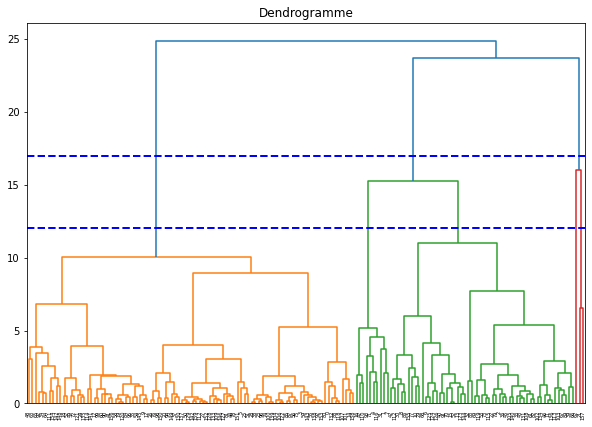

In [35]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme")

clusters = shc.linkage(X_scaled, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y=12, c='blue', lw=2, linestyle='dashed') #5 clusters
plt.axhline(y=17, c='blue', lw=2, linestyle='dashed') #3 clusters
plt.show()

## K-means

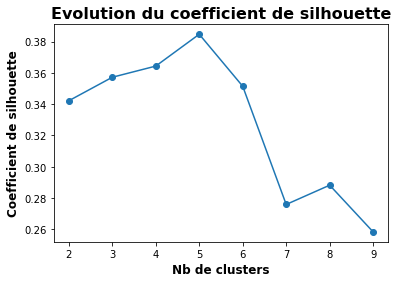

In [36]:
from sklearn import preprocessing, cluster, metrics #Il se base sur la distance moyenne du point à son groupe et la distance moyenne du point à son groupe voisin
X_norm= preprocessing.scale(data)
silhouettes =[]
for num_clusters in range(2, 10):
    cls= cluster.KMeans(n_clusters=num_clusters)
    cls.fit(X_norm)
    silh= metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)
plt.plot(range(2,10), silhouettes, marker='o')
plt.xlabel("Nb de clusters", fontsize=12, y=1, weight='bold')
plt.ylabel("Coefficient de silhouette", fontsize=12, y=0.5, weight='bold')
plt.title("Evolution du coefficient de silhouette", fontsize=16, y=1, weight='bold')
plt.show()